- 📚 데이터 사이언티스트의 실전노트, 이지영, [비제이퍼블릭](https://bjpublic.tistory.com/) 
- 🌟 [YouTube: 통계학 & 데이터과학](https://https://www.youtube.com/channel/UC2BreMMPUd0djRpA4UEaD3Q)
- 💻 [클래스101: 데이터 과학자 실무 프로젝트 (분석+예측모델 + AWS 자동화)](https://class101.page.link/MhG4)


## 3.2 기본 통계로 질문자 되기

In [1]:
import scipy.stats
#유의수준 0.05, 자유도가 1일 때 카이제곱 기각값 계산
scipy.stats.chi2.ppf(1-0.05, 1)

3.841458820694124

### 3.2.16 [가설검정 (3) - 검정통계량] (Page 279)

In [2]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd

# 실험 결과 데이터 프레임 만들기
df_website = pd.DataFrame({
                             '버전': ['친환경', '천연'],
                             '방문자': [1500, 1500],
                             '클릭자수': [139, 118]
                           })[['버전', '방문자', '클릭자수']]
df_website


,버전,방문자,클릭자수
0,친환경,1500,139
1,천연,1500,118


In [3]:
from scipy import stats 
print('>>> 직접 계산해서 독립표본 비율 검정하기')

# <친환경버전 H1> 값 입력
size_a = df_website["방문자"].values[0]
converted_a = df_website["클릭자수"].values[0]
# <천연버전 H0> 값 입력 
size_b = df_website["방문자"].values[1]
converted_b = df_website["클릭자수"].values[1]

# 비율 계산하기 클릭자 수/방문자수 
prop_a = converted_a / size_a
prop_b = converted_b / size_b
print(f'    (친환경 버전 비율) prop_a= { prop_a:.3f}, (천연 버전 비율) prop_b = {prop_b:.3f}')

# 두 집단의 평균비율 
prop_pooled = (size_a*prop_a + size_b*prop_b) / (size_a + size_b)

# 두 집단 간 비율의 표준오차 계산
var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)

# Z분포에 의한 통계값 계산 
z_score = np.abs(prop_b - prop_a) / np.sqrt(var)

# Z통계값의 확률 계산
z_score_pr = 1 - stats.norm(loc = 0, scale = 1).cdf(z_score)
print(f'    Z통계값(z_score) = {z_score:.3f}, 확률(z_score_pr) = {z_score_pr:.3f}')

print('\n>>> 통계분석 패키지로 검정 통계량 계산')

# 통계분석 패키지 이용 
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest 
# 입력값: 배열로 & 출력값:z_score, p-value (다음 내용 참조)
converted = np.array(list(df_website["클릭자수"]))
sizes = np.array(list(df_website["방문자"]))

# 두 독립표본 비율 검정 함수 이용
z_score, z_score_pr = proportions_ztest(converted, sizes, alternative = 'larger')
print(f'    Z통계값(z_score) = {z_score:.3f}, 확률(z_score_pr) = {z_score_pr:.3f}')

 


>>> 직접 계산해서 독립표본 비율 검정하기
    (친환경 버전 비율) prop_a= 0.093, (천연 버전 비율) prop_b = 0.079
    Z통계값(z_score) = 1.370, 확률(z_score_pr) = 0.085

>>> 통계분석 패키지로 검정 통계량 계산
    Z통계값(z_score) = 1.370, 확률(z_score_pr) = 0.085


### 3.2.17 [가설검정(4) - α vs. p-value, 임계치 vs. 검정 통계량] (Page 282)

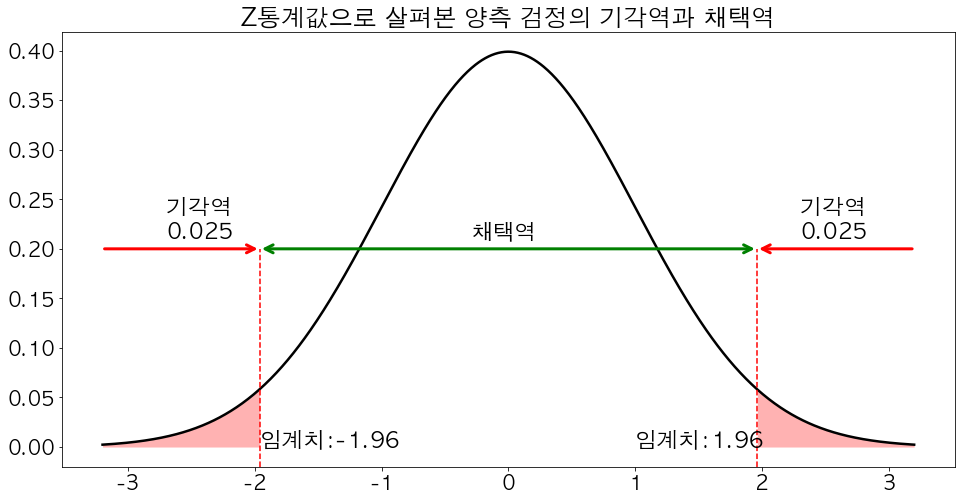

In [4]:
# 정규분포 생성을 위한 라이브러리 불러오기
from scipy.stats import norm
import scipy.stats
from scipy import stats

# 그래프 관련 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# matplotlib 폰트 설정 (Mac OS인 경우) 및 유니코드 에러 고치기 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 
plt.rc('font', size=20) # 글씨 크기 설정
plt.rc('figure', figsize=[16,8]) # 크기설정

x = np.linspace(-3.2, 3.2, 1000) # [-3.2 3.2]범위에서 개수가 1000개가 되도록 값 설정
iq = stats.norm(0, 1) # 평균:0, 표준편차:1인 pdf

# 임계치 유의수준 설정
crit_val_p = 1.96
crit_val_n = -1.96
alpha = 0.05

# 표준정규분포 그래프 그리기 
plt.plot(x, iq.pdf(x), 'black', lw=2.5) 

# crit_val을 기준으로 빨간색 점선 추가
plt.axvline(x=crit_val_p, ymax=0.5, color='red', linestyle='dashed', lw=1.5)
plt.axvline(x=crit_val_n, ymax=0.5, color='red', linestyle='dashed', lw=1.5)

# crit_val을 기준으로 색 채우기
plt.fill_between(x[x>crit_val_p], 0, norm.pdf(x)[x>crit_val_p].flatten(), # 색 채울 범위 설정
                 alpha=0.3,  # 투명도 
                 linewidth=0, # 선두께
                 color='red')
plt.fill_between(x[x<crit_val_n], 0, norm.pdf(x)[x<crit_val_n].flatten(), # 색 채울 범위 설정
                 alpha=0.3,  # 투명도 
                 linewidth=0, # 선두께
                 color='red')

# 화살표 추가 
plt.annotate('', # 텍스트 없는 화살표
             xy=(crit_val_n, 0.20), # 범위설정
             xytext=(crit_val_p, 0.20), # 범위설정
             arrowprops=dict(arrowstyle="<->",
                             connectionstyle="arc3", 
                             color='green', 
                             lw=3))
plt.annotate('', # 텍스트 없는 화살표
             xy=(crit_val_n, 0.20), # 범위설정
             xytext=(-3.2, 0.20), # 범위설정
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3", 
                             color='red', 
                             lw=3))
plt.annotate('', # 텍스트 없는 화살표
             xy=(crit_val_p, 0.20), # 범위설정
             xytext=(3.2, 0.20), # 범위설정
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3", 
                             color='red', 
                             lw=3))

# 그래프에 텍스트 추가 
plt.text(-0.3, 0.21, "채택역", size=22)
plt.text(-2.7, 0.21, f"기각역 \n{alpha/2.}", size=22) # 양방적 검정이므로 2로 나눠줌
plt.text(2.3, 0.21, f"기각역 \n{alpha/2.}", size=22) # 양방적 검정이므로 2로 나눠줌
plt.text(-1.96, 0, f"임계치:{crit_val_n}", size=22)
plt.text(1, 0, f"임계치:{crit_val_p}", size=22)

plt.title('Z통계값으로 살펴본 양측 검정의 기각역과 채택역')
plt.show()


유의수준이 0.05 일때, 임계치: 1.645


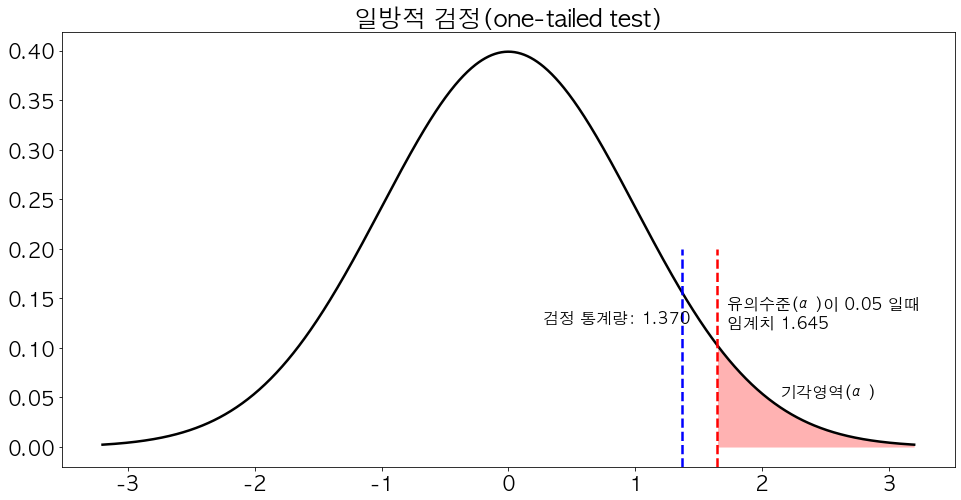

In [5]:
# 표준정규분포를 그리기 위한 x, y값 설정하기
x = np.linspace(-3.2, 3.2, 1000) # [-3.2 3.2]범위에서 개수가 1000개가 되도록 값 설정 (그래프 x값)
iq = stats.norm(0, 1) # 평균:0, 표준편차:1인 pdf (그래프 y값)

# 표준정규분포 그래프 그리기 
plt.plot(x, iq.pdf(x), 'black', lw=2.5) 

# 유의수준(α), 임계치 설정 
alpha = 0.05 
crit_val = norm.ppf(1-alpha) # 유의수준이 0.05일 때, Z값
print(f'유의수준이 {alpha} 일때, 임계치: {crit_val:.3f}') # :.3f 소숫점 3자리 표시

# 위에서 계산한 z_score값을 기준을로 파란색 점선 추가
plt.axvline(x=z_score, ymax=0.5, color='blue',linestyle='dashed', lw=2.5)

# crit_val을 기준으로 빨간색 점선 추가
plt.axvline(x=crit_val, ymax=0.5, color='red',linestyle='dashed', lw=2.5)

# crit_val을 기준으로 색 채우기
plt.fill_between(x[x>crit_val], 0, norm.pdf(x)[x>crit_val].flatten(), # 색 채울 범위 설정
                 alpha=0.3,  # 투명도 
                 linewidth=0, # 선두께
                 color='red')

plt.text(0.27, 0.125,  # 글씨 위치 선정
         f'검정 통계량: {z_score:.3f}', fontsize=16)
plt.text(crit_val+0.08, 0.12,  # 글씨 위치 선정
         f'유의수준(α)이 {alpha} 일때 \n임계치 {crit_val:.3f}', fontsize=16)
plt.text(crit_val+0.5, 0.05,   # 글씨 위치 선정
         f'기각영역(α)', fontsize=16)
plt.title('일방적 검정(one-tailed test)')
plt.show()


⚠ 저작권: Copyright 2022. (이지영) all rights reserved. 본 자료는 저작권법에 의하여 보호받는 저작물로서 이에 대한 무단 복제 및 배포를 원칙적으로 금합니다. 협의 없이 배포하거나 무단으로 사용할 경우 저작권법 제136조, 137조, 138조 위반으로 사전 경고 없이 손해배상 청구 등 민,형사상의 책임과 처벌을 받을 수 있습니다.